In [1]:
import numpy as np
from sklearn.datasets import make_blobs

In [3]:
X,y = make_blobs(n_samples=50,
                n_features=2,
                centers=5,
                cluster_std = .8,
                random_state=3
                )

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap(plt.cm.gist_ncar)

<Figure size 432x288 with 0 Axes>

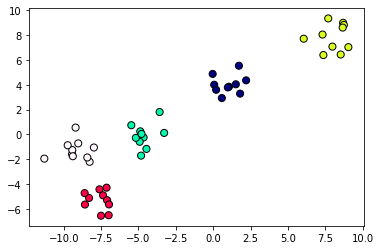

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');

In [7]:
def plotBoundary(X, clf, mesh=True, cmap=plt.get_cmap()):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=cmap)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [8]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)

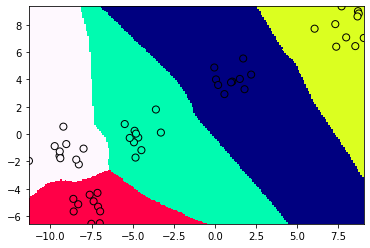

In [10]:
clf.fit(X,y)

plt.scatter(X[:,0],X[:,1],marker='o',s=50,c=y,edgecolors='k')

plotBoundary(X,clf)

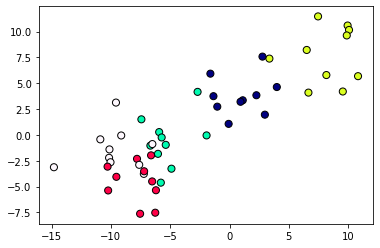

In [11]:
X,y = make_blobs(n_samples=50,
                n_features=2,
                centers=5,
                cluster_std = 2,
                random_state=3
                )
plt.scatter(X[:,0],X[:,1],marker='o',s=50,c=y,edgecolors='k')

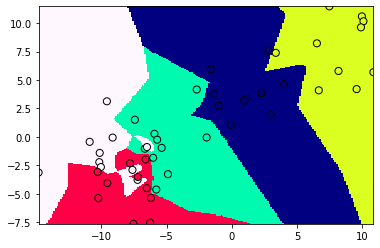

In [12]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X,y)

plt.scatter(X[:,0],X[:,1],marker='o',s=50,c=y,edgecolors='k')

plotBoundary(X,clf)

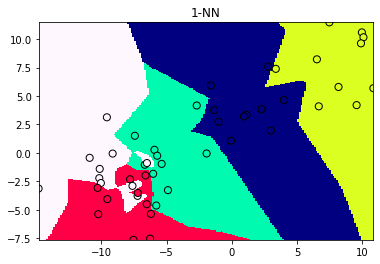

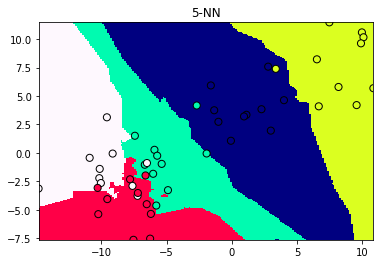

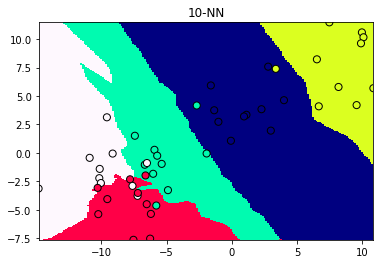

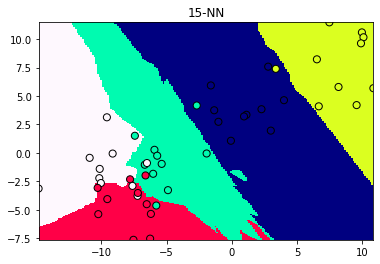

In [15]:
for n in [1,5,10,15]:
    clf.n_neighbors = n
    plt.scatter(X[:,0],X[:,1],marker='o',s=50,c=y,edgecolors='k')
    plotBoundary(X,clf)
    plt.title("{0}-NN".format(n))
    plt.show()

In [16]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X=data.data
y=data.target

In [17]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1,
                 train_size=0.8,
                 test_size=0.2,
                 random_state=0)

train_index, test_index = next(ss.split(X,y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [20]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [21]:
clf.score(X_train,y_train)

1.0

In [22]:
clf.score(X_test,y_test)

0.9122807017543859

In [23]:
n_range = range(1,20)
scores = []
for n in n_range:
    clf.neighbors = n
    score = clf.score(X_test, y_test)
    print(n,score)
    scores.append(score)
scores = np.array(scores)

1 0.9122807017543859
2 0.9122807017543859
3 0.9122807017543859
4 0.9122807017543859
5 0.9122807017543859
6 0.9122807017543859
7 0.9122807017543859
8 0.9122807017543859
9 0.9122807017543859
10 0.9122807017543859
11 0.9122807017543859
12 0.9122807017543859
13 0.9122807017543859
14 0.9122807017543859
15 0.9122807017543859
16 0.9122807017543859
17 0.9122807017543859
18 0.9122807017543859
19 0.9122807017543859


(0.8, 1)

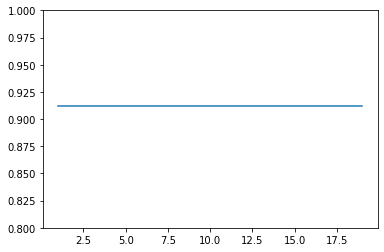

In [24]:
plt.plot(n_range, scores)
plt.ylim(0.8, 1)

In [26]:
clf = neighbors.RadiusNeighborsClassifier()
clf.fit(X_train, y_train)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                          metric_params=None, n_jobs=None, outlier_label=None,
                          p=2, radius=1.0, weights='uniform')

In [27]:
n_range = [2000,4000,8000]
for n in n_range:
    clf.radius = n
    score = clf.score(X_test,y_test)
    print(n,score)

2000 0.6052631578947368
4000 0.5877192982456141
8000 0.5877192982456141


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
clf.fit(X_train_scale,y_train)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                          metric_params=None, n_jobs=None, outlier_label=None,
                          p=2, radius=8000, weights='uniform')

In [29]:
X_test_scale = scaler.transform(X_test)

In [30]:
n_range = [3,4,5,6,7]
for n in n_range:
    clf.radius = n
    score = clf.score(X_test_scale, y_test)
    print(n, score)

3 0.5877192982456141
4 0.5877192982456141
5 0.5877192982456141
6 0.5877192982456141
7 0.5877192982456141


In [31]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_scale, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [32]:
n_range = range(1,20)
scores2 = []
for n in n_range:
    clf.neighbors = n
    score = clf.score(X_test_scale, y_test)
    print(n,score)
    scores2.append(score)
scores2 = np.array(scores2)

1 0.9473684210526315
2 0.9473684210526315
3 0.9473684210526315
4 0.9473684210526315
5 0.9473684210526315
6 0.9473684210526315
7 0.9473684210526315
8 0.9473684210526315
9 0.9473684210526315
10 0.9473684210526315
11 0.9473684210526315
12 0.9473684210526315
13 0.9473684210526315
14 0.9473684210526315
15 0.9473684210526315
16 0.9473684210526315
17 0.9473684210526315
18 0.9473684210526315
19 0.9473684210526315


(0.8, 1)

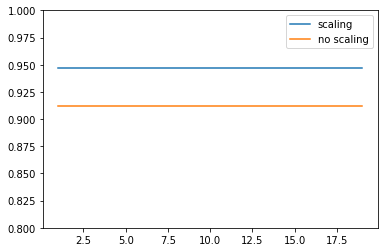

In [34]:
plt.plot(n_range, scores2, label="scaling")
plt.plot(n_range, scores,label="no scaling")
plt.legend(loc='best')
plt.ylim(0.8, 1)